# Exploratory Data Analysis (EDA)
                                              

*   Exploratory Data Analysis (EDA) is crucial for understanding the
dataset's structure, distribution, and relationships between variables.

*  So we have implemented our code using eda for the specified questions in the project proposal


# Data collection:

*  In this step, we have used pandas to read each CSV file into a DataFrame and display the first few rows.
*  This allows us to check the column names, data types, and sample data points. Understanding the structure of the data is crucial for subsequent analysis steps.
*  This code loads each dataset into a pandas DataFrame and stores the first few rows of each DataFrame in a dictionary. Printing these previews provides an initial understanding of the data contained in each dataset.




In [1]:
import pandas as pd

# Load each dataset to understand their structure
genome_scores_df = pd.read_csv('genome-scores.csv')
genome_tags_df = pd.read_csv('genome-tags.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

# Display the first few rows of each dataframe to understand their structure
dfs_preview = {
    "Genome Scores": genome_scores_df.head(),
    "Genome Tags": genome_tags_df.head(),
    "Links": links_df.head(),
    "Movies": movies_df.head(),
    "Ratings": ratings_df.head(),
    "Tags": tags_df.head(),
}

dfs_preview


{'Genome Scores':    movieId  tagId  relevance
 0        1      1    0.02875
 1        1      2    0.02375
 2        1      3    0.06250
 3        1      4    0.07575
 4        1      5    0.14075,
 'Genome Tags':    tagId           tag
 0      1           007
 1      2  007 (series)
 2      3  18th century
 3      4         1920s
 4      5         1930s,
 'Links':    movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
 'Movies':    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|

# Data Pre-Processing
# Merging Datasets:

*  In this step,we have merged the movies dataset with the ratings dataset  
   based on the common column 'movieId'. This allows us to analyze movie ratings by genre.
*  Merging datasets is essential for combining relevant information from
   different sources into a single dataset for analysis.
*  By merging these datasets, we create a unified dataset that includes both
   movie information and user ratings, which is crucial for subsequent analysis of movie genres and ratings.

In [2]:
# Start with EDA focusing on movie genre preferences and observing ratings across genres.

# Merge `movies.csv` with `ratings.csv` to analyze ratings for each movie and subsequently by genre.
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId')
# Display the first few rows of the merged DataFrame
movies_ratings_df.head(20)


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,3.5,1.227571e+09
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0,1.167583e+09
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0,1.265224e+09
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1.108273e+09
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,26,3.0,1.280516e+09


# Questions -1 & 2:

# 1)What are the most popular movie genres among users in the dataset?
# 2)How do movie ratings vary across different genres?


# Data Analysis
# Movie genres and ratings analysis:


*   After merging, we split the genres column since a movie can belong to multiple genres. This enables us to calculate the average rating for each genre.Understanding the distribution of ratings across different genres provides insights into user preferences and helps in identifying popular genres.
*  Exploding the genres column creates multiple rows for each movie, each corresponding to a different genre.This allows us to calculate the average rating for each genre independently.


In [3]:
# Since a movie can belong to multiple genres, we need to split the genres and then calculate the average rating for each genre.
# Explode the 'genres' column so that each genre gets its own row, keeping the movieId and rating intact.
movies_ratings_df['genres'] = movies_ratings_df['genres'].str.split('|')
movies_genres_exploded_df = movies_ratings_df.explode('genres')

# Calculate average rating for each genre
average_ratings_by_genre = movies_genres_exploded_df.groupby('genres')['rating'].mean().reset_index()

# Calculate statistics for ratings across genres
ratings_stats_by_genre = movies_genres_exploded_df.groupby('genres')['rating'].describe().reset_index()

average_ratings_by_genre, ratings_stats_by_genre


(                genres    rating
 0   (no genres listed)  3.319668
 1               Action  3.469023
 2            Adventure  3.517840
 3            Animation  3.607275
 4             Children  3.431498
 5               Comedy  3.424803
 6                Crime  3.692598
 7          Documentary  3.696996
 8                Drama  3.686477
 9              Fantasy  3.512614
 10           Film-Noir  3.912516
 11              Horror  3.290651
 12                IMAX  3.590939
 13             Musical  3.566605
 14             Mystery  3.676111
 15             Romance  3.551217
 16              Sci-Fi  3.481891
 17            Thriller  3.530325
 18                 War  3.795677
 19             Western  3.596287,
                 genres     count      mean       std  min  25%  50%  75%  max
 0   (no genres listed)    1866.0  3.319668  1.235114  0.5  2.5  3.5  4.0  5.0
 1               Action  578202.0  3.469023  1.069447  0.5  3.0  3.5  4.0  5.0
 2            Adventure  455885.0  3.517840  1.0

# Data Visualization
# Bar plot and Box plot of Average Ratings by Genre:


*   Visualizing average movie ratings by genre helps understand user preferences.
*  A Bar plot is used to display average ratings for each genre. This provides a clear visual representation of which genres tend to have higher or lower ratings, and helps in identifying popular genres among users
*  The box plot next to it,also provides a clear visualization of the Distribution of average ratings for various genres.

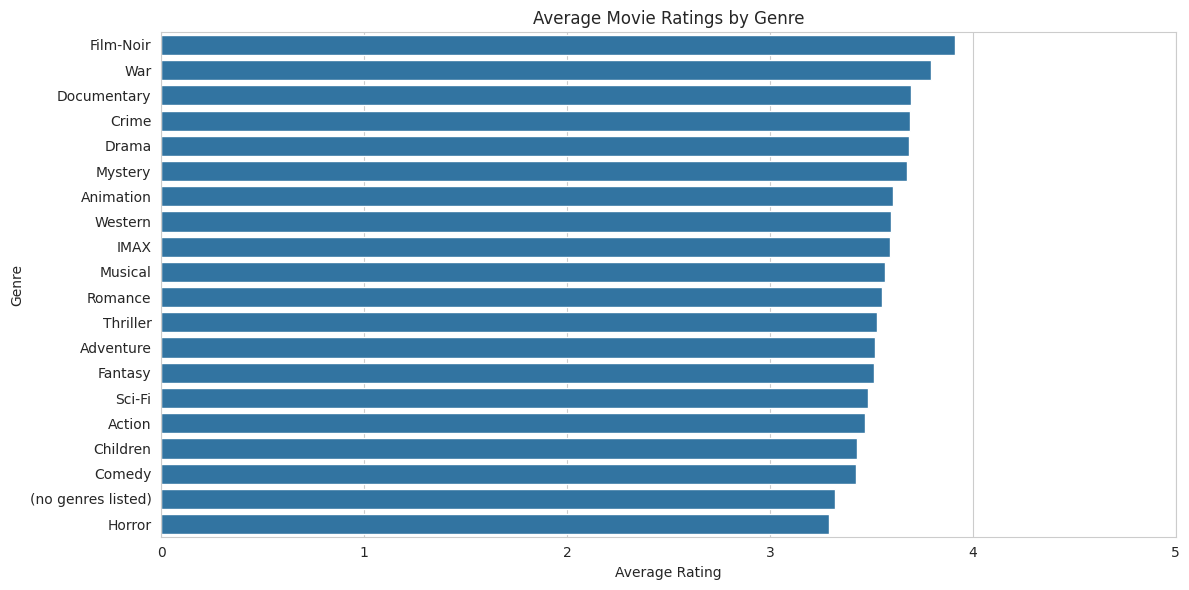

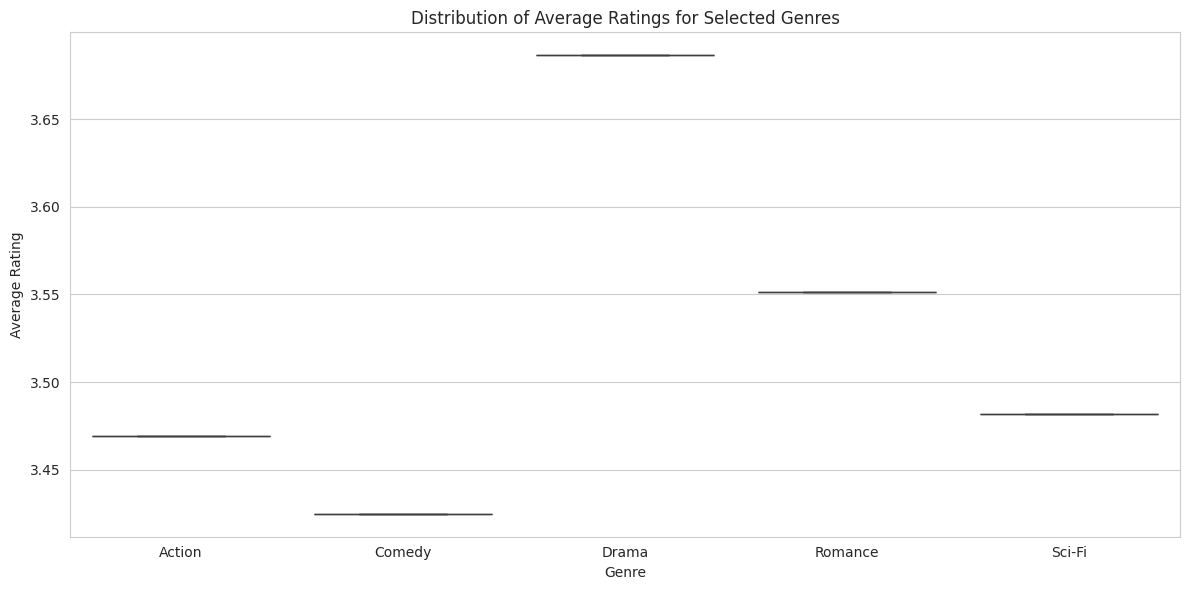

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for Average Ratings by Genre
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genres', data=average_ratings_by_genre.sort_values('rating', ascending=False))
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.xlim(0, 5)  # Ratings are between 0 and 5
plt.tight_layout()

# Show plot
plt.show()

# Plot for the distribution of ratings across genres for a few selected genres
selected_genres = ['Drama', 'Comedy', 'Action', 'Sci-Fi', 'Romance']
filtered_stats = ratings_stats_by_genre[ratings_stats_by_genre['genres'].isin(selected_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='mean', data=filtered_stats)
plt.title('Distribution of Average Ratings for Selected Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.tight_layout()

# Show plot
plt.show()


# Conclusions:
# Question-1 conclusion :

from the first bar plot,we can conclude that "film-Noir" genre has more average rating compared to all,and then "War" genre comes next then "documentary" genre,so in this way we have analyzed the data and visualized the most popular genres based on ratings.


# Question-2 conclusion:

From the above box plot,we can clearly see how do ratings vary across different selected genres of Drama', 'Comedy', 'Action', 'Sci-Fi', 'Romance' respectively.

# Question 3:
# 3) Are there any trends or patterns in the usage of tags over time?

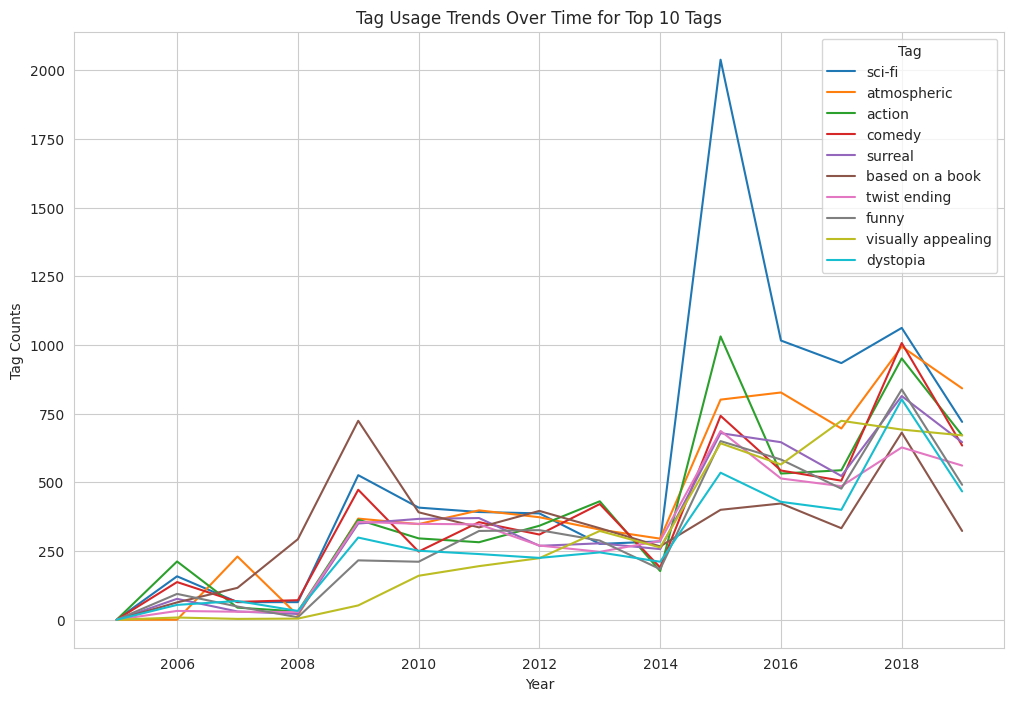

In [20]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')

# Extract year from timestamp
tags_df['year'] = tags_df['timestamp'].dt.year

# Group by year and count the occurrence of each tag
tag_counts_over_time = tags_df.groupby(['year', 'tag']).size().unstack(fill_value=0)

# Plotting tag counts over time for the top 10 tags
top_tags = tag_counts_over_time.sum().sort_values(ascending=False).head(10).index
tag_counts_over_time[top_tags].plot(kind='line', figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Tag Counts')
plt.title('Tag Usage Trends Over Time for Top 10 Tags')
plt.legend(title='Tag')
plt.show()

# Question 3 Conclusion:
From the above line plot,Each line represents the count of a specific tag over the years. This visualization allows you to observe how the popularity of different tags changes over time.

# Question 4:
# 4) Are there temporal patterns in movie ratings?

# Temporal patterns Analysis of Ratings:

*   In this step, we convert timestamps to datetime objects and extract the year to analyze rating trends over time. This allows us to understand how ratings have evolved over the years and identify any temporal patterns in user behavior.
*  Converting timestamps to datetime objects and extracting the year allows us to aggregate ratings on an annual basis, providing insights into how ratings have changed over time.


In [5]:
from datetime import datetime

# Convert timestamps to datetime in the ratings DataFrame
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Extract year from datetime for easier analysis of temporal patterns
ratings_df['year'] = ratings_df['datetime'].dt.year

# Group by year to see the number of ratings and average rating per year
ratings_per_year = ratings_df.groupby('year').agg(count=('rating', 'size'), avg_rating=('rating', 'mean')).reset_index()


# Data Visualization:
# Line plots of ratings trends over time

*  Visualizing the number of ratings and average ratings over time using line plots helps identify temporal patterns in user behavior. This enables us to observe trends such as increasing or decreasing user engagement with movies over the years.

*  These line plots provide insights into how the number of ratings and average ratings have changed over time, helping us identify any trends or patterns in user behavior.


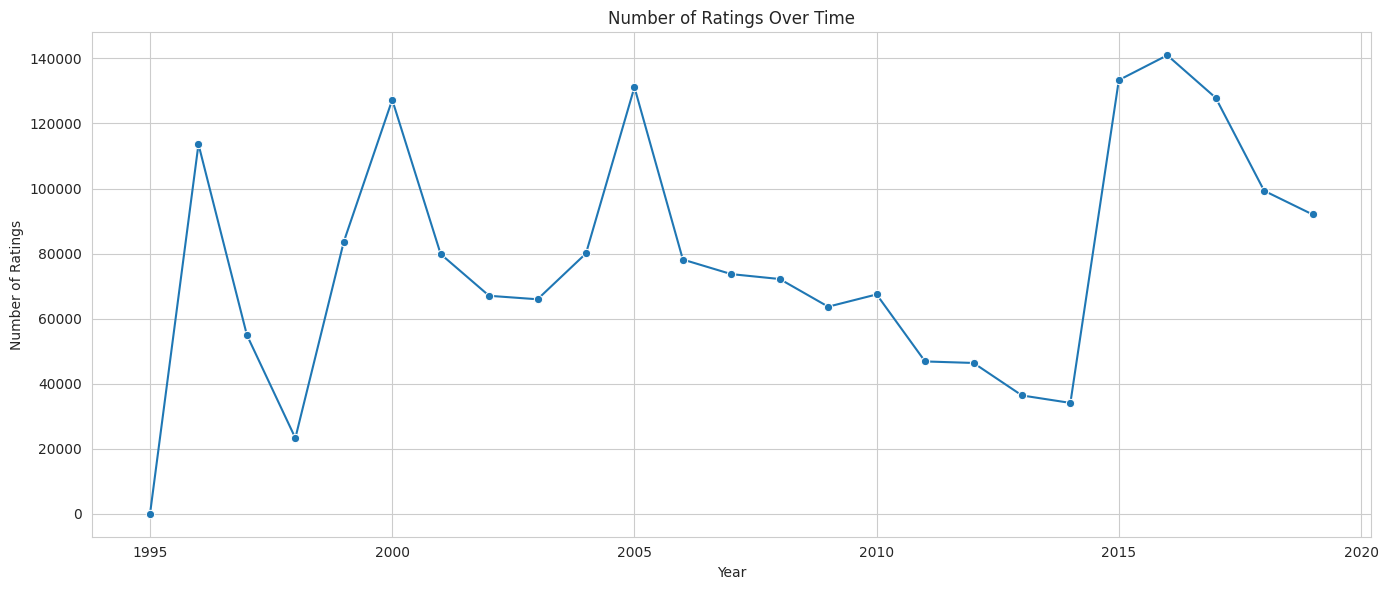

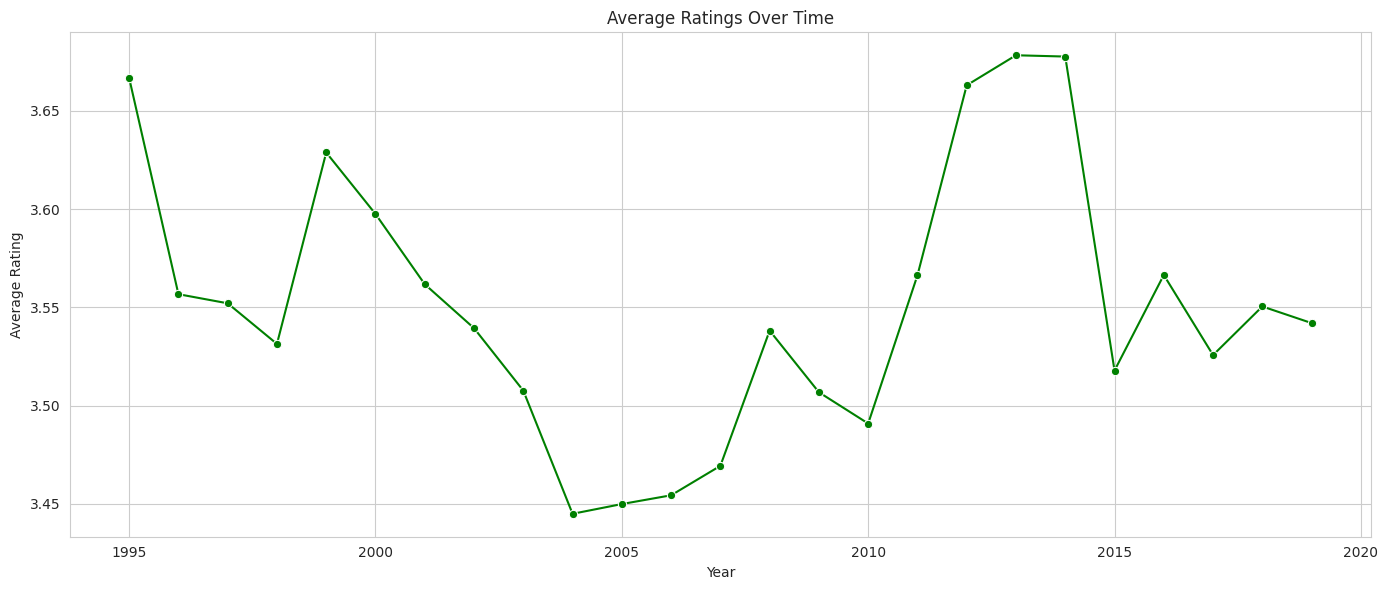

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the number of ratings over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='count', data=ratings_per_year, marker='o')
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

# Plotting the average rating over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='avg_rating', data=ratings_per_year, marker='o', color='green')
plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


# Question 5:
# Can we predict movie ratings based on user characteristics and movie features?

# Data Pre-processing for Machine Learning
# Extracting Year and Genre Count from Movie Data:

* In this step, we preprocess the movie dataset by extracting the release year from the movie titles and counting the number of genres associated with each movie. This allows us to incorporate temporal and categorical information into our analysis.

* Extracting Year from Titles: We use regular expressions to extract the release year from the movie titles and create a new 'year' column in the dataframe.

* Counting Genres per Movie: We split the 'genres' column using the '|' delimiter and count the number of genres for each movie. This information is stored in a new column named 'genre_count'.



In [7]:
# Extract year from movie titles
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)').astype(float)

# Count the number of genres per movie
movies_df['genre_count'] = movies_df['genres'].apply(lambda x: len(x.split('|')))

# Preview the updated movies DataFrame
movies_df.head()


,movieId,title,genres,year,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,3
4,5,Father of the Bride Part II (1995),Comedy,1995.0,1


# Merging Datasets for Machine Learning :

* we merge the movies dataset with the ratings dataset based on the common column 'movieId'.
* This merge operation combines movie information with user ratings, creating a unified dataset suitable for machine learning tasks

In [8]:
# Merging movies_df with ratings_df
ml_dataset = pd.merge(movies_df, ratings_df, on='movieId')

# Dropping unnecessary columns for ML model ('timestamp' and 'datetime' from ratings_df)
ml_dataset.drop(['timestamp', 'datetime'], axis=1, inplace=True)

# Preview the merged dataset
ml_dataset.head()


,movieId,title,genres,year_x,genre_count,userId,rating,year_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,2,3.5,2006.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,3,4.0,2015.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,4,3.0,2019.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,5,4.0,1997.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,8,4.0,1998.0


# Data Cleaning and Feature Engineering:
* Here, we performed feature engineering by cleaning up column names, one-hot encoding genres, and preparing features (X) and target (y) for machine learning tasks.

* Clean up Column Names:  Here, we rename the column year_x to year for clarity and drop the redundant year_y column, which likely resulted from a merge operation.
* Simplify Genres and One-Hot Encoding: The genres column often contains multiple genres separated by '|' for each movie. We simplify this by keeping only the first genre, assuming it represents the primary genre of the movie. Then, we perform one-hot encoding on this simplified genres column. One-hot encoding converts categorical data into numerical format, creating binary columns for each category (genre in this case).
* Drop Rows with Missing Values: It's common for datasets to contain missing values (NaNs), which can affect the performance of machine learning models. Here, we remove rows with any missing values from the dataset to ensure data integrity and model accuracy.
* Split the Dataset: To train and evaluate machine learning models, it's essential to split the dataset into separate training and testing sets. We use the train_test_split function from scikit-learn to randomly split the cleaned dataset into training and testing sets. This split allows us to train the model on one subset and evaluate its performance on another, thereby assessing its generalization ability.

In [9]:
from sklearn.model_selection import train_test_split

# Clean up column names
ml_dataset.rename(columns={'year_x': 'year'}, inplace=True)
ml_dataset.drop(['year_y'], axis=1, inplace=True)

# One-Hot Encoding genres
ml_dataset['genres'] = ml_dataset['genres'].apply(lambda x: x.split('|')[0])
 # Simplify by keeping only the first genre
genres_encoded = pd.get_dummies(ml_dataset['genres'], prefix='genre')

# Merge the one-hot encoded genres back into the main dataset
ml_dataset = pd.concat([ml_dataset, genres_encoded], axis=1)

# Dropping rows with any missing values in the dataset
ml_dataset_cleaned = ml_dataset.dropna()

# Prepare features (X) and target (y) again after cleaning
X_cleaned = ml_dataset_cleaned.drop(['movieId', 'title', 'genres', 'rating', 'userId'], axis=1)
y_cleaned = ml_dataset_cleaned['rating']

# Splitting the cleaned dataset into training and testing sets again
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train_cleaned.shape, X_test_cleaned.shape, y_train_cleaned.shape, y_test_cleaned.shape


((1550520, 22), (387630, 22), (1550520,), (387630,))

# Model Training and Evaluation:

* Model Training: Linear Regression and Random Forest
* In this step, we train machine learning models for regression using Linear Regression and Random Forest algorithms. We then evaluate the performance of these models on the testing data.




# i) Linear Regression Model:
* Define and Initialize the Linear Regression Model:

We have imported the LinearRegression class from scikit-learn and have created an instance of the Linear Regression model.
* Train the Linear Regression Model:

We have trained the Linear Regression model using the cleaned training data (X_train_cleaned and y_train_cleaned). This step involves fitting the model to the training data, allowing it to learn the relationship between the features and the target variable.
* Predict Ratings on the Test Data:

After training the model, we have used it to predict ratings on the cleaned testing data (X_test_cleaned). The model utilizes the learned parameters to make predictions based on the input features.
* Visualization of ratings:

bar chart is plotted between predicted and actual ratings

* Calculate Performance Metrics:

We have computed evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) to assess the performance of the Linear Regression model on the testing data. These metrics quantify the differences between the predicted ratings and the actual ratings, providing insights into the model's accuracy and performance.


Predicted Ratings:
[3.15748187 3.42850876 3.40892745 ... 3.63534641 3.37937659 3.24762564]


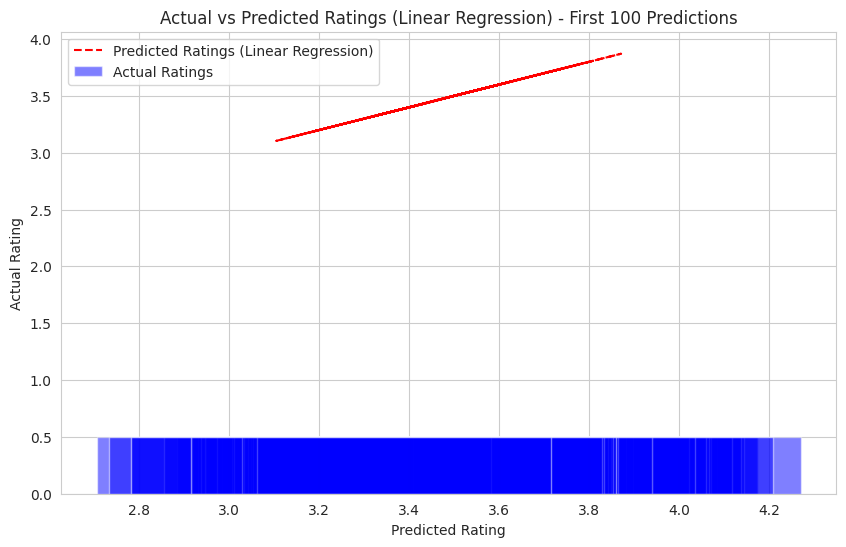

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# Define and initialize the Linear Regression model
lr_model = LinearRegression()


# train the Linear Regression model on the cleaned dataset
lr_model.fit(X_train_cleaned, y_train_cleaned)

# Predict ratings on the cleaned testing data
y_pred_lr = lr_model.predict(X_test_cleaned)

# Display predicted ratings with heading
print("Predicted Ratings:")
print(y_pred_lr)

# Define indices for the bar chart
indices = np.arange(len(y_test_cleaned))

# plotting bar chart between actual and predicted ratings
import matplotlib.pyplot as plt

# Define indices for the bar chart
# Limit to first 100 predictions for plotting as it takes more time for all predictions to plot in the huge dataset

indices = np.arange(100)


# Sort the actual and predicted ratings arrays
y_test_sorted = np.sort(y_test_cleaned)[:100]
y_pred_lr_sorted = y_pred_lr[np.argsort(y_test_cleaned)[:100]]

# Plotting the actual and predicted ratings for the first 100 predictions
plt.figure(figsize=(10, 6))
plt.bar(y_pred_lr_sorted, y_test_sorted, color='b', alpha=0.5, label='Actual Ratings')
plt.plot(y_pred_lr_sorted, y_pred_lr_sorted, color='r', label='Predicted Ratings (Linear Regression)', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.title('Actual vs Predicted Ratings (Linear Regression) - First 100 Predictions')
plt.legend()
plt.show()


In [13]:
# Calculate the performance metrics on the cleaned dataset
mse_lr = mean_squared_error(y_test_cleaned, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test_cleaned, y_pred_lr)

# Display performance metrics with headings
print("\nPerformance Metrics:")
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("Mean Absolute Error (MAE):", mae_lr)




Performance Metrics:
Mean Squared Error (MSE): 1.094492551886022
Root Mean Squared Error (RMSE): 1.0461799806371856
Mean Absolute Error (MAE): 0.8303643894833281


# ii) Random Forest Regressor Model:



Initialize the Random Forest Regressor Model:

We have created an instance of the Random Forest Regressor model with 100 decision trees and set the random state for reproducibility.

Train the Random Forest Model:

We have trained the model using the cleaned training data, consisting of features (X) and target (y).

Predict Ratings on the Test Data:

We have used the trained Random Forest model to predict ratings on the cleaned testing data (X_test_cleaned).

Visualization of ratings:

bar chart is plotted between predicted and actual ratings

Calculate Performance Metrics:

We have computed evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) to evaluate the performance of the Random Forest model on the testing data. These metrics help assess how well the model's predictions align with the actual ratings.




Predicted Ratings:
[2.7100636  3.57555685 3.37432297 ... 3.44012194 3.55915243 3.32453194]


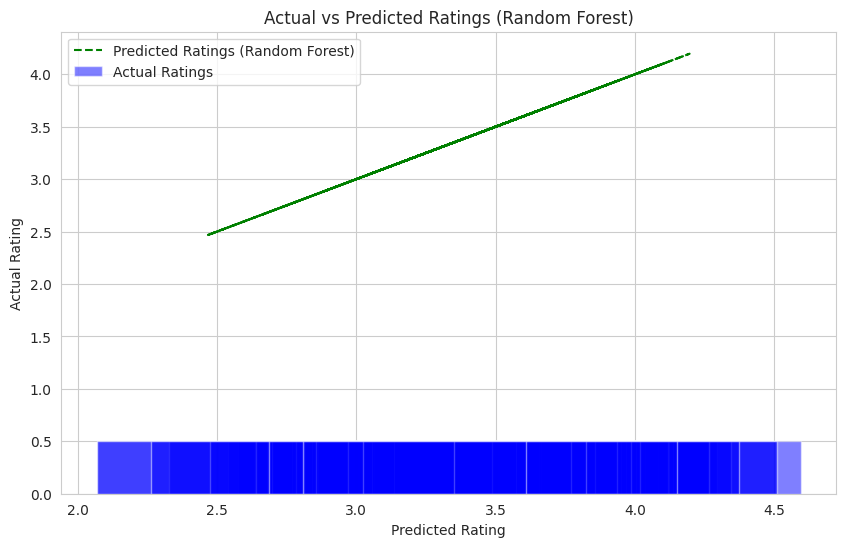

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the cleaned training data
rf_model.fit(X_train_cleaned, y_train_cleaned)

# Predict ratings on the cleaned testing data with the Random Forest model
y_pred_rf = rf_model.predict(X_test_cleaned)

# Display predicted ratings with heading
print("Predicted Ratings:")
print(y_pred_rf)

# Define indices for the bar chart
indices = np.arange(100)

# plotting bar chart between actual and predicted ratings
import matplotlib.pyplot as plt

# Sort the actual and predicted ratings arrays for Random Forest
y_test_sorted = np.sort(y_test_cleaned)[:100]
y_pred_rf_sorted = y_pred_rf[np.argsort(y_test_cleaned)[:100]]

# Plotting the actual and predicted ratings for Random Forest
plt.figure(figsize=(10, 6))
plt.bar(y_pred_rf_sorted, y_test_sorted, color='b', alpha=0.5, label='Actual Ratings')
plt.plot(y_pred_rf_sorted, y_pred_rf_sorted, color='g', label='Predicted Ratings (Random Forest)', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.legend()
plt.show()



In [15]:
# Calculate the performance metrics for the Random Forest model
mse_rf = mean_squared_error(y_test_cleaned, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_cleaned, y_pred_rf)

# Display performance metrics with headings
print("\nPerformance Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):",rmse_rf)
print("Mean Absolute Error (MAE):",mae_rf)



Performance Metrics:
Mean Squared Error (MSE): 1.0271535218690087
Root Mean Squared Error (RMSE): 1.013485827167311
Mean Absolute Error (MAE): 0.7949365184963895


# Comparision of Linear Regression model vs Random Forest Regression model



In the the below bar plot:

* Linear Regression model's higher bars indicate higher values for MSE, RMSE, and MAE compared to RF.

* Random forest regression's lower bars indicate lower values for MSE, RMSE, and MAE compared to LR.

* Therefore, based on this comparison, Random Forest Regression is outperforming Linear Regression as it has Lower values for MSE, RMSE, and MAE which indicate better performance in regression tasks as they reflect how close the predicted values are to the actual values.

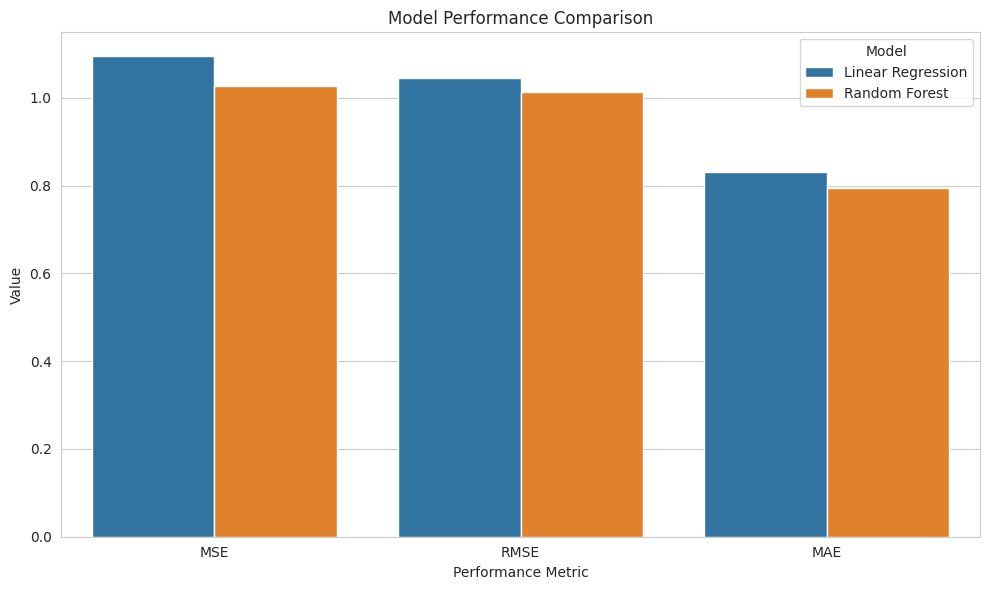

In [16]:
# Preparing data for visualization
model_performance = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf]
}

performance_df = pd.DataFrame(model_performance)

# Melting the DataFrame to make it suitable for sns.barplot
performance_melted = performance_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=performance_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.tight_layout()

# Show plot
plt.show()

# Conclusion for 5th question:
* We have sucessfully predicted ratings based on various user characteristics and movie features by considering 'movieId', 'title', 'genres', 'rating', 'userId' respectively
* We have implemented both linear regression and random forest regressor models to predict the ratings based on various user and movie features
* The Random forest regressor model has low Mean Squared error(Mae),Root mean squared error(Rmse) and Mean absolute error(mae) compared to Linear regression model which is more efficient in predicting the ratings
